## Quiz 2 de Estadística

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import norm, chi2, t, f
#from scipy import stats
df = pd.read_csv('../files/quiz_2.csv')
df.head()

,maquina_a,maquina_b
0,199.2,201.0
1,200.7,201.4
2,200.7,201.2
3,200.5,201.2
4,200.2,201.1


Dos máquinas, cada una operada por una persona, son utilizadas para cortar tiras de caucho, cuya longitud ideal es de 200 mm, con una tolerancia de +/- 1.7 mm. Al final del turno un inspector toma 54 Y 56 muestras de cada una de las máquinas e inspecciona si la longitud de ambas máquinas cumplen las especificaciones o no. A continuación se muestran las 110 mediciones tomadas para cada máquina

a. ¿Existe diferencias estadísticas entre la longitud de la máquina 1 y la máquina?

In [3]:
print(df.shape)
df.describe()

(56, 2)


,maquina_a,maquina_b
count,56.000000,54.000000
mean,200.058929,199.931481
std,1.168959,1.149048
min,198.200000,197.800000
25%,199.000000,198.925000
50%,199.950000,200.100000
75%,201.050000,200.875000
max,202.000000,202.100000


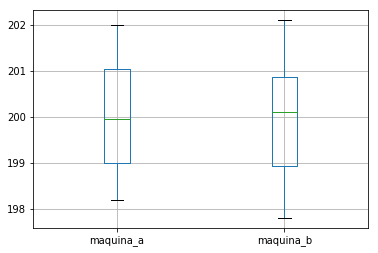

In [4]:
df.boxplot()

In [5]:
std2_a = (df['maquina_a'].std())**2
std2_b = (df['maquina_b'].std())**2
std2_a, std2_b

(1.3664642857142886, 1.3203109713487051)

In [6]:
f0 = std2_a / std2_b
f0

1.0349563969149158

In [7]:
F_alpha = f.isf(0.025,df['maquina_a'].count()-1, df['maquina_b'].count()-1) # Se usa la cola derecha por eso es f.isf() 
F_alpha

1.7169731073971102

Como 1.7169 no es mayor a 1.0349 no puedo rechazar a H0, por lo tanto la razón de varianza son iguales, por esta razón usamos la primera hipotesis de medias

In [8]:
n_a = df['maquina_a'].count()
n_b = df['maquina_b'].count()
std_a = df['maquina_a'].std()
std_b = df['maquina_b'].std()
mean_a = df['maquina_a'].mean()
mean_b = df['maquina_b'].mean()

In [9]:
sp = sqrt(((n_a-1)*std_a**2 + (n_b-1)*std_b**2)/(n_a + n_b - 2))
sp

1.159230336919666

In [10]:
t0 = (mean_a - mean_b)/(sp*sqrt((1/n_a)+(1/n_b)))

In [11]:
t(0.025, 108)

In [12]:
from scipy.stats import median_test

In [14]:
df['maquina_b'].fillna(df['maquina_a'].mean(), inplace = True)
df.head()

,maquina_a,maquina_b
0,199.2,201.0
1,200.7,201.4
2,200.7,201.2
3,200.5,201.2
4,200.2,201.1


In [15]:
median_test(list(df['maquina_a'].values), list(df['maquina_b'].values))

(0.0, 1.0, 200.07946428571427, array([[28, 28],
        [28, 28]]))

In [18]:
help(median_test)

Help on function median_test in module scipy.stats.morestats:

median_test(*args, **kwds)
    Mood's median test.
    
    Test that two or more samples come from populations with the same median.
    
    Let ``n = len(args)`` be the number of samples.  The "grand median" of
    all the data is computed, and a contingency table is formed by
    classifying the values in each sample as being above or below the grand
    median.  The contingency table, along with `correction` and `lambda_`,
    are passed to `scipy.stats.chi2_contingency` to compute the test statistic
    and p-value.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        The set of samples.  There must be at least two samples.
        Each sample must be a one-dimensional sequence containing at least
        one value.  The samples are not required to have the same length.
    ties : str, optional
        Determines how values equal to the grand median are classified in
        the contingenc